# <center style='color:darkolivegreen'> `K-Means` clustering (using `Scikit-Learn`) </center>

## 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

## 2. Create data

In [2]:
X, y = datasets.make_blobs(n_samples=500, centers=3, random_state=10)

In [3]:
X.shape, y.shape

((500, 2), (500,))

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([167, 167, 166]))

## 3. Visualize Data

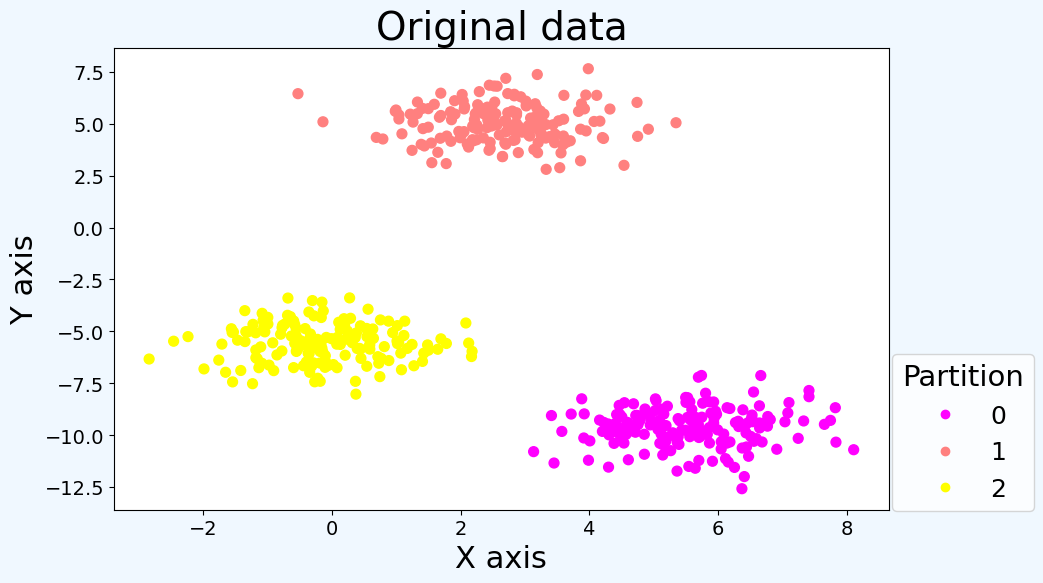

In [6]:
plt.figure(figsize=(10, 6), facecolor='aliceblue')

sc = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

plt.xlabel('X axis', fontsize=22)
plt.ylabel('Y axis', fontsize=22)
plt.title('Original data', fontsize=28)

plt.legend(*sc.legend_elements(), title='Partition', fontsize=18, title_fontsize=21, bbox_to_anchor=(1.203, 0.365));
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## 4. Perform preprocessing

In [7]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

## 5. Perform `KMeans` clustering

In [8]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=10)
kmeans.fit(scaled)
preds = kmeans.labels_

In [9]:
metrics.fowlkes_mallows_score(y, preds)

1.0

## 7. Comparison of predictions with targets

In [10]:
cm = metrics.confusion_matrix(y, preds)

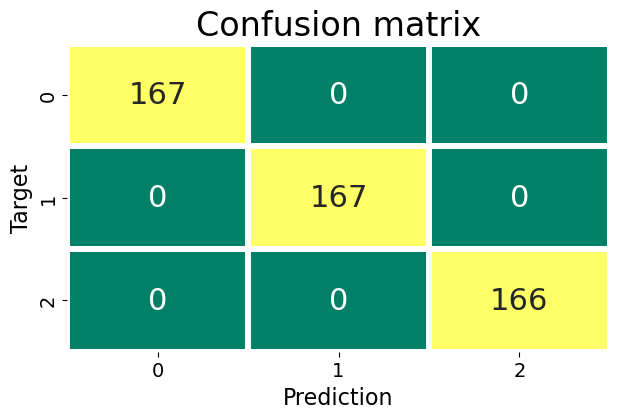

In [11]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=3, annot_kws={'size': 22}, cbar=False, cmap='summer')

plt.xlabel('Prediction', fontsize=16)
plt.ylabel('Target', fontsize=16)
plt.title('Confusion matrix', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## 8. Elbow plot to determine the best set of clusters

In [12]:
N = [2, 3, 4, 5, 6, 7]
wsse = []

for x in N:
    KMEANS = KMeans(n_clusters=x, n_init='auto', random_state=10)
    KMEANS.fit(scaled)
    wsse.append(KMEANS.inertia_)

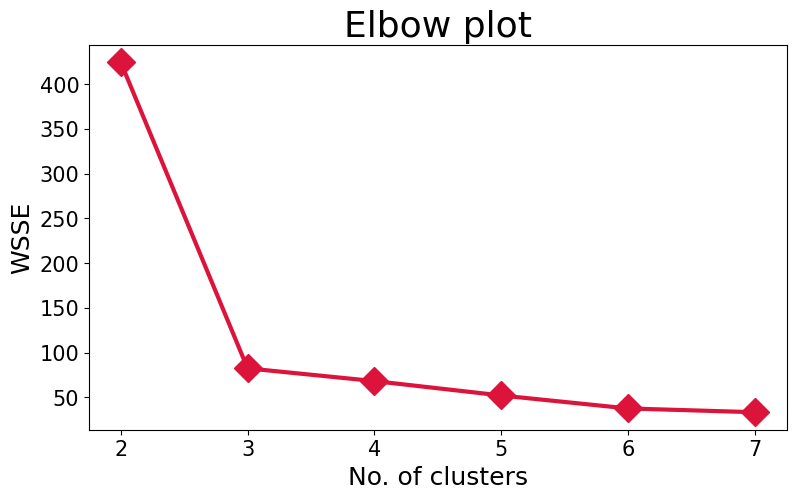

In [13]:
plt.figure(figsize=(9, 5))

plt.plot(N, wsse, color='crimson', linewidth=3, marker='D', markersize=14)

plt.xlabel('No. of clusters', fontsize=18)
plt.ylabel('WSSE', fontsize=18)
plt.title('Elbow plot', fontsize=26)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

## 9. Check `Silhouette score` to determine the optimal number number of clusters

In [14]:
sil = []

for z in N:
    _KMEANS_ = KMeans(n_clusters=z, n_init='auto', random_state=10)
    _KMEANS_.fit(scaled)
    PREDS = _KMEANS_.labels_
    sil.append(metrics.silhouette_score(scaled, PREDS))

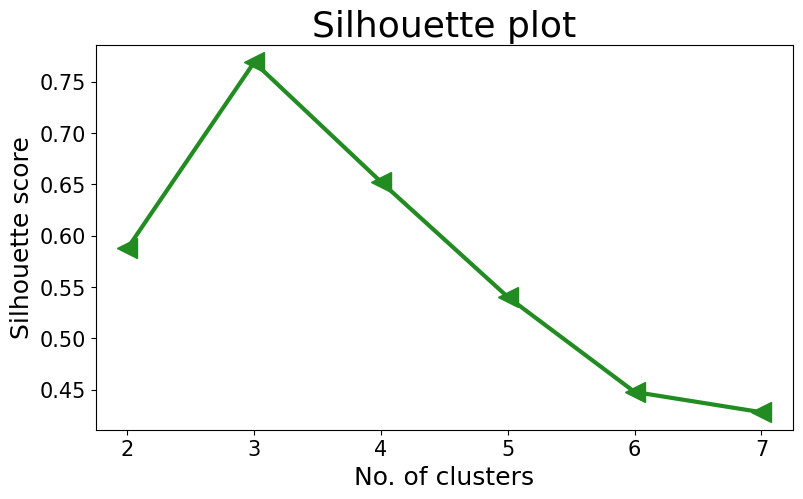

In [15]:
plt.figure(figsize=(9, 5))

plt.plot(N, sil, color='forestgreen', linewidth=3, marker='<', markersize=14)

plt.xlabel('No. of clusters', fontsize=18)
plt.ylabel('Silhouette score', fontsize=18)
plt.title('Silhouette plot', fontsize=26)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

#### Higher `Silhouette score` denotes better clustering